# Movie Recommendation System - Mike Blakeman
Final Project CIS731

### Loading the Dataset (Obtain data)
Load three datasets from the MovieLens data.

This contains a ratings file, a users file, and a movies file.

In [0]:
# Import libraries to read in as Pandas DataFrames
import numpy as np
import pandas as pd

# Load ratings file
ratings = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/ratings.csv', sep='\t', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Load users file
users = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/users.csv', sep='\t', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Load movies csv
movies = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/movies.csv', sep='\t', usecols=['movie_id', 'title', 'genres'])

Visualize the data that we've read in from the csv's.

In [3]:
movies.sample(10)

,movie_id,title,genres
270,273,Mary Shelley's Frankenstein (1994),Drama|Horror
1996,2065,"Purple Rose of Cairo, The (1985)",Comedy|Drama|Romance
245,248,Houseguest (1994),Comedy
2365,2434,Down in the Delta (1998),Drama
966,978,"Blue Angel, The (Blaue Engel, Der) (1930)",Drama
3141,3210,Fast Times at Ridgemont High (1982),Comedy
1066,1082,"Candidate, The (1972)",Drama
2825,2894,Romance (1999),Drama|Romance
3809,3879,"Art of War, The (2000)",Action
623,628,Primal Fear (1996),Drama|Thriller


In [4]:
ratings.sample(10)

,user_id,movie_id,rating,timestamp
434721,2652,1270,5,973535268
875467,5286,1552,4,961089815
652928,3934,2048,3,965709172
449804,2774,1411,4,973063452
67388,453,3481,4,976245146
751683,4482,1942,4,965097178
572024,3507,2828,1,967066222
698199,4172,2858,5,965332628
148560,956,2553,3,975130897
104232,692,260,4,975833817


In [5]:
users.sample(10)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
2480,2481,M,03054,35-44,sales/marketing
261,262,F,68503,25-34,academic/educator
5537,5538,M,55102,45-49,programmer
5420,5421,M,22030,35-44,technician/engineer
5268,5269,M,37211,18-24,other or not specified
2967,2968,F,48104,18-24,other or not specified
2828,2829,M,10013,45-49,writer
5984,5985,F,78705-5221,18-24,college/grad student
5522,5523,M,60187,35-44,other or not specified


In this dataset there are 3706 movies and 6040 users as seen below:

In [6]:
uniqueMovieCount = ratings.movie_id.unique().shape[0]
uniqueUserCount = ratings.user_id.unique().shape[0]
print('Number of movies:' + str(uniqueMovieCount))
print('Number of users:' + str(uniqueUserCount))

Number of movies:3706
Number of users:6040


Format ratings matrix with empty ratings for movies the user has not rated yet.

In [7]:
RatingsDf = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
RatingsDf.sample(10)

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1925,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0
4766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1388,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
4974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3032,5.0,4.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0,4.0,5.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


## Cleaning the Data

In [0]:
# De-normalize the data and put it in a numpy array.
allRatings = RatingsDf.values
averageUserRating = np.mean(allRatings, axis = 1)
deAveragedRatings = allRatings - averageUserRating.reshape(-1, 1)

With my ratings matrix properly formatted and normalized, I'm ready to do some dimensionality reduction. But first, let's go over the math.

## Matrix Factorization (MF) (Exploring data)

In [10]:
sparsity = round(1.0 - len(ratings) / float(uniqueUserCount * uniqueMovieCount), 3)
print("Our dataset is %i percent sparse." % (sparsity * 100))

Our dataset is 95 percent sparse.


## Support Vector Decomposition (SVD)

In [17]:
from scipy.sparse.linalg import svds
U, diagonalArray, Vt = svds(deAveragedRatings, k = 50)
diagonalArray = np.diag(diagonalArray)
allPredictedRatings = np.dot(np.dot(U, diagonalArray), Vt) + averageUserRating.reshape(-1, 1)
preds = pd.DataFrame(allPredictedRatings, columns = RatingsDf.columns)
preds.sample(10)

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
4896,3.657606,1.796567,0.274742,-0.202614,-0.057173,0.492454,0.012864,0.112644,0.294157,2.087990,0.488252,0.438106,0.372542,0.045003,0.271663,0.185932,0.096943,-0.264014,0.082841,0.514456,0.702796,0.292463,0.090998,0.439298,0.302842,-0.077517,-0.122186,-0.132295,-0.123926,0.088313,-0.013185,0.894083,0.009759,3.201340,0.025483,0.428253,0.031937,-0.029208,0.730231,0.061532,...,0.036106,0.140503,0.132039,0.115279,1.219210,0.802847,0.379388,0.126332,0.075873,0.086660,0.334596,0.109433,-0.117219,0.794565,1.439432,0.823999,0.106485,1.181417,0.138481,1.008989,0.064350,0.189999,0.126105,0.236500,0.409692,0.084503,0.080422,0.010810,0.072477,0.066794,0.077990,0.026101,0.051188,0.030985,0.106114,0.362768,0.138770,0.132070,0.127835,0.108194
1724,-0.336365,0.150682,-0.040934,-0.027420,-0.021707,0.086297,-0.091089,0.052595,-0.048195,0.452722,-0.074312,0.040546,-0.022981,0.003514,0.035924,0.124727,-0.146623,0.156664,0.091425,-0.103117,-0.059832,0.161158,0.044778,0.505862,-0.062997,0.019318,0.023446,-0.050531,0.290711,-0.041086,0.023674,0.331554,-0.010225,-0.540923,-0.009067,0.307759,-0.009885,-0.037326,-0.064923,-0.019399,...,-0.005213,-0.027056,0.028507,-0.162961,0.015785,-0.006886,0.015626,-0.001036,-0.024421,-0.018229,-0.014460,-0.016207,0.053095,-0.076519,-0.121353,-0.091494,0.047610,0.002788,-0.021582,-0.042585,-0.002377,-0.028142,-0.008155,0.089007,0.066928,-0.001786,-0.003345,-0.003766,-0.005284,-0.016607,0.044593,-0.019225,-0.014511,0.012903,0.007530,0.191450,0.228763,0.040173,0.022977,0.010248
5031,4.677233,-0.204603,-0.028687,-0.006344,0.159886,-0.105325,0.089721,0.002454,-0.031513,0.186093,0.653392,-0.092054,0.016236,-0.237171,0.006238,0.243372,-0.395344,0.120922,0.132437,-0.096413,0.739437,-0.070907,-0.019520,-0.005678,-0.016347,-0.177880,0.005714,0.038250,0.397604,-0.073219,-0.047335,0.955834,0.016511,2.555172,-0.119517,0.176889,0.035922,-0.006345,2.398727,-0.033263,...,-0.004362,-0.013047,-0.136256,-0.236531,-0.251450,-0.203319,-0.060734,-0.050996,0.019526,0.036539,-0.029424,0.009738,0.002964,-0.099210,-0.169777,-0.108536,0.026866,-0.084523,0.031608,-0.101994,0.018601,0.029680,0.005368,-0.083705,-0.026809,-0.001182,-0.000462,0.016736,0.006321,-0.003957,-0.014853,0.018383,0.017965,-0.040972,-0.023869,0.384873,0.000397,-0.003147,-0.032413,-0.300571
5292,2.939176,-0.070061,-0.037735,-0.054167,0.094515,0.591055,0.115993,0.043974,-0.009039,0.356986,0.514043,-0.027238,0.081469,-0.026087,0.081907,0.009198,0.461731,-0.130138,0.049620,-0.089675,0.790841,-0.049826,0.124809,0.005089,0.363673,0.056611,0.001080,-0.006926,0.333762,-0.006149,0.011683,1.565455,0.034947,2.136463,-0.091556,0.919354,0.041847,0.035556,0.983063,-0.013817,...,0.000158,-0.063012,-0.104565,0.304403,0.046211,0.020242,-0.013625,0.032082,0.016238,0.035470,0.058505,0.011975,0.074502,0.085892,0.063301,0.001529,0.015063,0.061660,0.031198,0.122105,0.027536,0.063095,0.043216,-0.013250,0.170820,0.021689,0.027556,0.036625,0.034207,0.028969,0.019988,0.014728,0.027436,0.029785,0.016083,0.170425,-0.425161,-0.043683,-0.047194,-0.091463
4757,0.197568,-0.047931,-0.047887,0.017308,-0.028593,-0.206502,0.120326,-0.012390,-0.012722,-0.175143,0.434344,0.007333,-0.021508,0.131587,-0.009813,0.147709,0.897412,-0.137563,-0.000619,-0.021747,-0.033982,0.004050,-0.033580,0.259045,0.507635,0.075197,0.010912,0.125096,-0.163428,0.043248,0.063667,0.381918,-0.006950,0.351183,0.060739,0.954992,-0.010590,-0.026058,0.020656,0.032478,...,-0.002639,0.006478,0.015592,0.175900,-0.079532,0.003435,-0.002987,0.039977,-0.037336,-0.029530,-0.004725,-0.019524,-0.041053,-0.031897,-0.042526,-0.086469,-0.013344,-0.062537,-0.002287,-0.043426,-0.002800,-0.006313,-0.005975,-0.015324,-0.030491,-0.00882

In [0]:
def getRecommendations(userId, movies, originalRatings, predictions, reccomendationCount):
    
    # Sort the predictions per user.
    row = userId - 1 # row offset
    sortedPredictions = preds.iloc[row].sort_values(ascending=False)
    
    # Merge user data and movies, then sort.
    userData = originalRatings[originalRatings.user_id == (userId)]
    userFullData = userData.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id')
    
    # Sort
    userFullData = userFullData.sort_values(['rating'], ascending=False)
    print('User {0} rated movie count:{1}\n'.format(userId, userFullData.shape[0]))

    # Get movies that are in the full data set    
    recommendations = movies[~movies['movie_id'].isin(userFullData['movie_id'])]
    print('\nFull data set')
    print(recommendations.head())

    # Merge columns on 'movie_id'
    recommendations = recommendations.merge(pd.DataFrame(sortedPredictions).reset_index(),
                                         how = 'left', 
                                         left_on = 'movie_id', 
                                         right_on = 'movie_id')
    print('\nJoin on column movie_id')
    print(recommendations.head())
    
    # Rename columns
    recommendations = recommendations.rename(columns = {row: 'Predictions'})
    print('\nRename columns')
    print(recommendations.head())

    # Sort desecending
    recommendations = recommendations.sort_values('Predictions', ascending=False)
    print('\nSort')
    print(recommendations.head())

    # Integer location based indexing
    recommendations = recommendations.iloc[:reccomendationCount, :-1]
    print('\nILOC')
    print(recommendations.head())

    return userFullData, recommendations

Recommend 10 movies for random user.

In [40]:
import random
randomUser = random.choice(users.user_id)
alreadyRated, predictions = getRecommendations(randomUser, movies, ratings, preds, 10)

User 289 rated movie count:74


Full data set
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

Join on column movie_id
   movie_id  ...       288
0         1  ...  0.681424
1         2  ...  0.070186
2         3  ...  0.139816
3         4  ...  0.047763
4         5  ...  0.152913

[5 rows x 4 columns]

Rename columns
   movie_id  ... Predictions
0         1  ...    0.681424
1         2  ...    0.070186
2         3  ...    0.139816
3         4  ...    0.047763
4         5  ...    0.152913

[5 rows x 4 columns]

Sort
      movie_id  ... Predictions
1168      1214  ...    2.90

In [42]:
# Top 10 movies that the user has already rated.
alreadyRated.head(10)

,user_id,movie_id,rating,timestamp,title,genres
0,289,1252,5,976567252,Chinatown (1974),Film-Noir|Mystery|Thriller
62,289,608,5,976567352,Fargo (1996),Crime|Drama|Thriller
39,289,1953,5,976567615,"French Connection, The (1971)",Action|Crime|Drama|Thriller
43,289,2762,5,976567615,"Sixth Sense, The (1999)",Thriller
26,289,2288,5,976567760,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller
52,289,50,5,976567252,"Usual Suspects, The (1995)",Crime|Thriller
57,289,3741,5,976568514,Badlands (1973),Crime|Drama
21,289,858,5,976568464,"Godfather, The (1972)",Action|Crime|Drama
20,289,1387,5,976568643,Jaws (1975),Action|Horror
17,289,912,5,976568552,Casablanca (1942),Drama|Romance|War


In [43]:
# Top 10 movies recommendations for the user
predictions

,movie_id,title,genres
1168,1214,Alien (1979),Action|Horror|Sci-Fi|Thriller
1532,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
1913,2028,Saving Private Ryan (1998),Action|Drama|War
876,903,Vertigo (1958),Mystery|Thriller
2078,2194,"Untouchables, The (1987)",Action|Crime|Drama
1885,2000,Lethal Weapon (1987),Action|Comedy|Crime|Drama
253,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1196,1249,Nikita (La Femme Nikita) (1990),Thriller
2822,2949,Dr. No (1962),Action
3390,3527,Predator (1987),Action|Sci-Fi|Thriller


## Modeling Our Data

Data modeling using Surprise library

In [0]:
!pip install surprise

In [0]:
# Import libraries from Surprise package
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate, KFold

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Define a cross-validation iterator
kf = KFold(n_splits=5)

# Use the SVD algorithm.
svd = SVD()

In [46]:
for trainset, testset in kf.split(data):

  # Train and test algorithm:
  svd.fit(trainset)
  predictions = svd.test(testset)

  # Compute and print the RMSE of the SVD algorithm
  accuracy.rmse(predictions, verbose=True)

RMSE: 0.8753
RMSE: 0.8753
RMSE: 0.8716
RMSE: 0.8724
RMSE: 0.8732


The average RMSE is: 0.8736 

Check the ratings that the user has given.

In [47]:
ratings[ratings['user_id'] == randomUser]

,user_id,movie_id,rating,timestamp
42372,289,1252,5,976567252
42373,289,589,4,976567760
42374,289,1260,4,976566826
42375,289,1261,5,976568993
42376,289,1196,3,976568711
42377,289,1198,5,976568788
42378,289,593,4,976566826
42379,289,1274,2,976567713
42380,289,745,5,976566826
42381,289,1358,4,976567615


Use SVD to predict the rating that the user will give to a random movie.

In [50]:
randomMovieId = random.choice(movies.movie_id)
randomMovie = movies[movies['movie_id'] == randomMovieId]
randomMovieTitle = str(randomMovie.title).split("    ")[1].split("\n")[0]
estimate = svd.predict(randomUser, randomMovieId).est
print("User {0} would rate \"{1}\" {2} stars.".format(randomUser, randomMovieTitle, estimate))

User 289 would rate "Fast Times at Ridgemont High (1982)" 3.68476207998 stars.


## Interpret Data

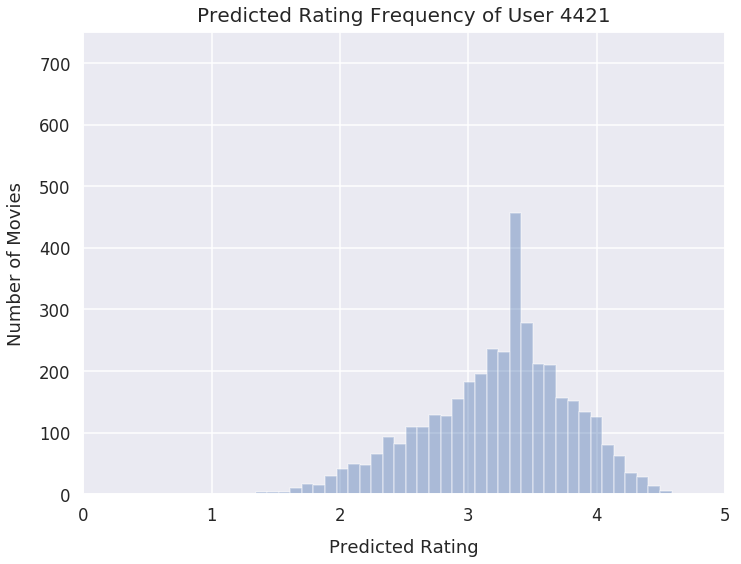

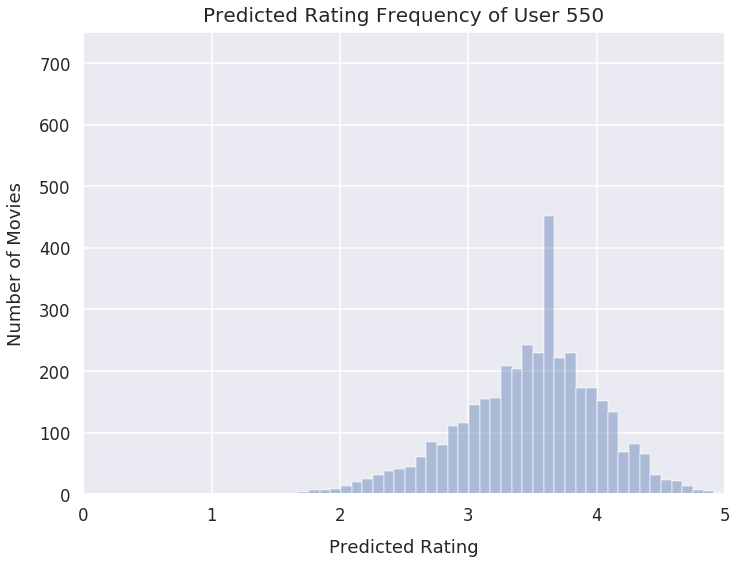

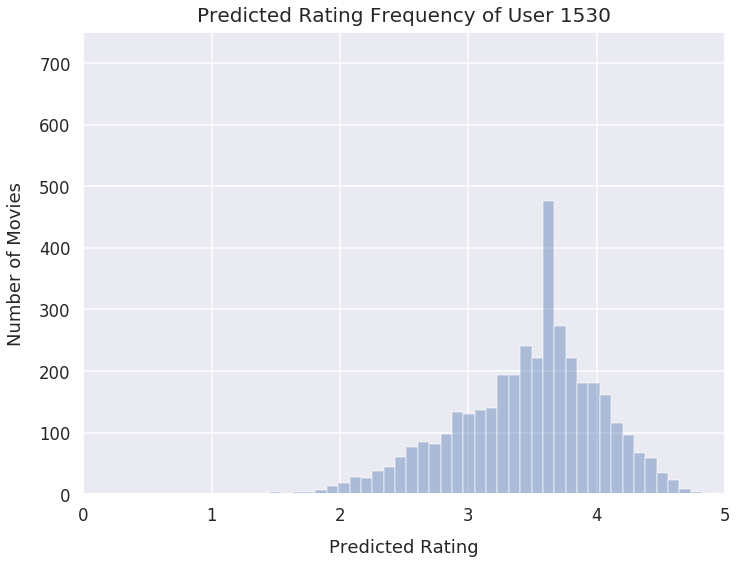

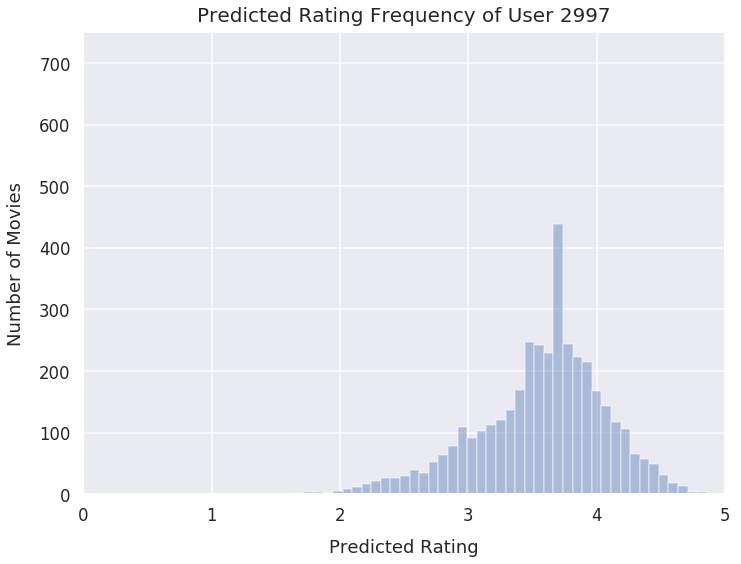

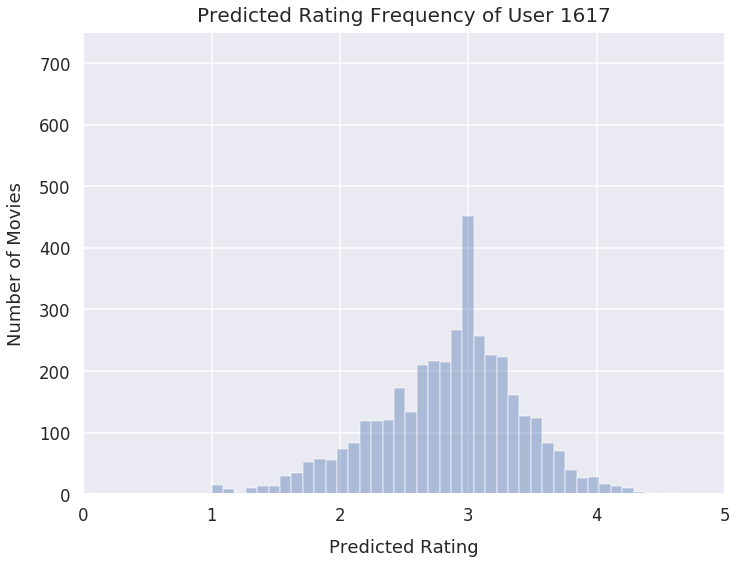

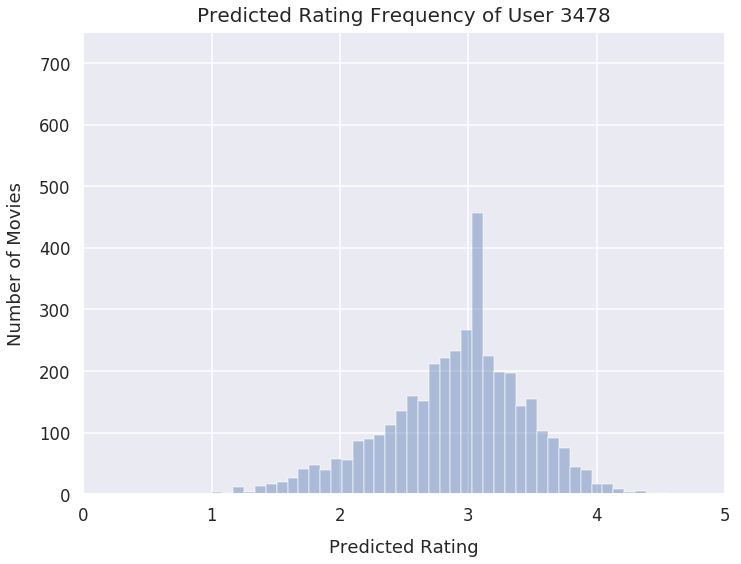

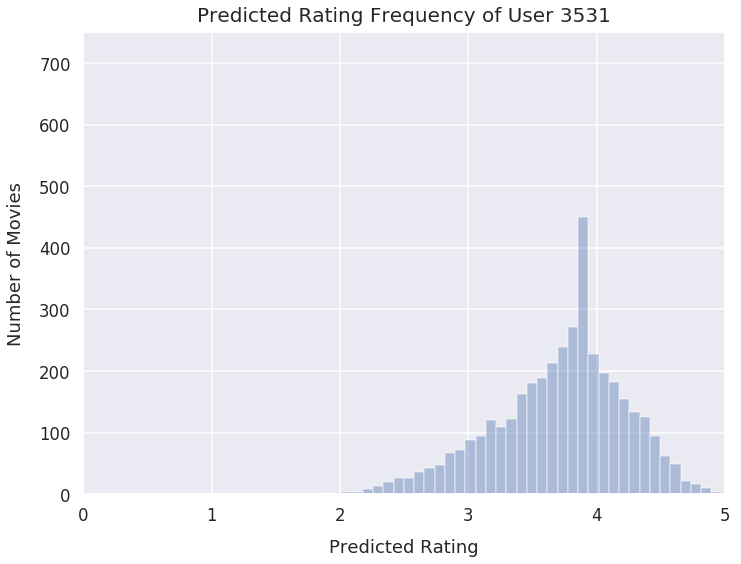

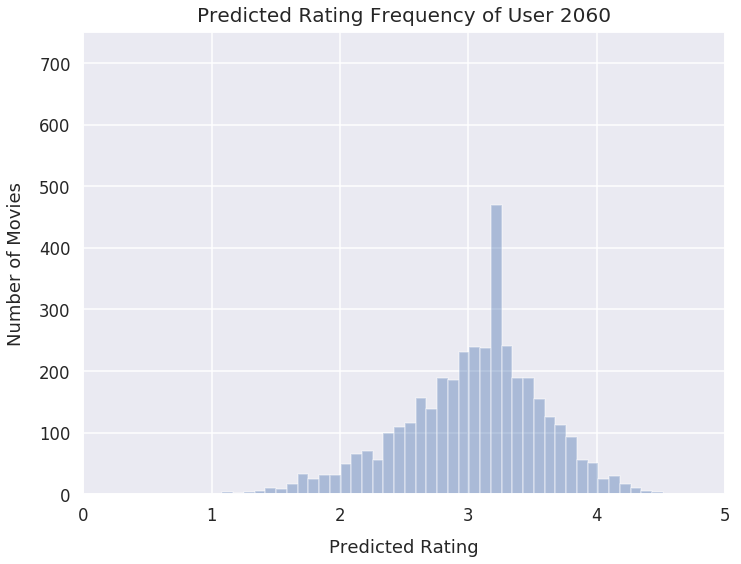

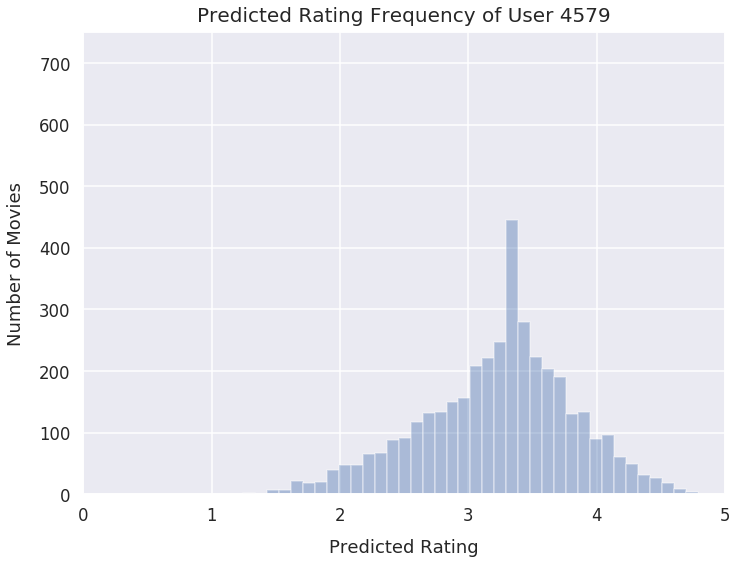

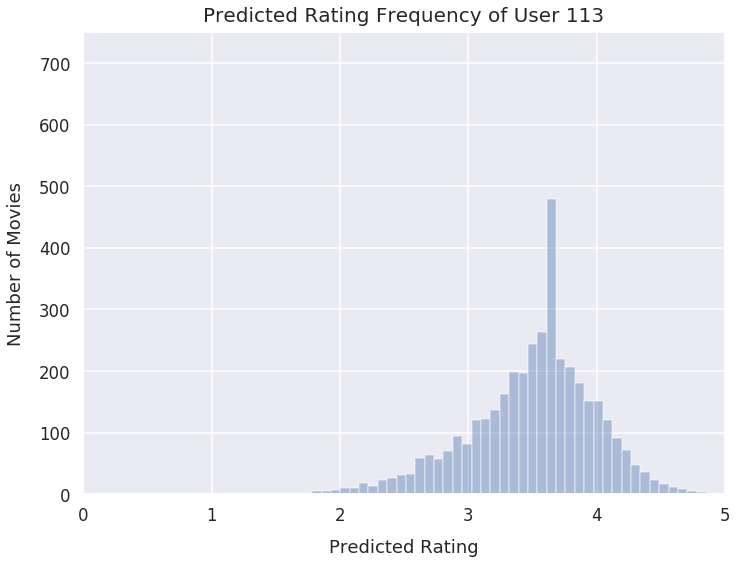

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

def getPredictedEsitmate(user, movie):
  return svd.predict(user, movie).est

def predictAllRatingsForUser(user):
  estimateDf = pd.DataFrame([])

  for movie in movies.movie_id:
      rating = getPredictedEsitmate(user, movie)
      estimateDf = estimateDf.append(pd.DataFrame({'movieId': movie, 'ratings': rating}, index=[0]), ignore_index=True)
  
  return estimateDf

def showPlotForDataFrame(user, dataFrame):
  sns.set(rc={'figure.figsize':(11.5, 8.5)})
  sns.set_context("talk")  
  sns.distplot(dataFrame['ratings'], kde=False)
  plt.xlim([0, 5])
  plt.ylim([0, 750])
  plt.xlabel("Predicted Rating", labelpad=14)
  plt.ylabel("Number of Movies", labelpad=14)
  title = "Predicted Rating Frequency of User %i" % user
  plt.title(title, fontsize=20, y=1.01)
  plt.show()

randomUsers = random.sample(users.user_id, 10)

for randomUser in randomUsers:
  df = predictAllRatingsForUser(randomUser)
  showPlotForDataFrame(randomUser, df)
  


